# Representing Data and Engineering Features

- Continuous Feature - uses Regression - quantity property
- Categorical Features - uses classification and is known as discrete features that are not usually numeric. Qualitative property?

In [42]:
# Pre-reqs and libraries to import
import sys
sys.path.append('C:\\Users\\James\\Desktop\\RoboticsJourney\\Self_Study\\2.PatternReg.ML\\introduction_to_ml_with_python')
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

## Categorical Features

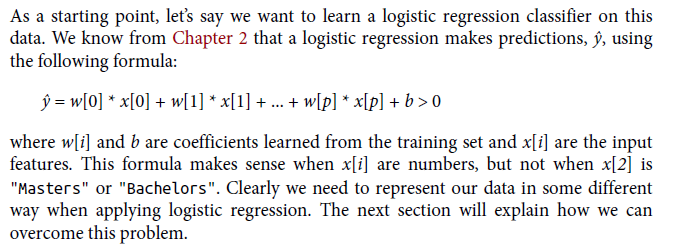

### One-out-of-N-encoding Dummy Variables

- Replacing categories with a 0 or 1 value, like true / false properties instead.
- Apparently makes sense for Linear Binary Classification

In [23]:
import pandas as pd
data = pd.read_csv("C:/Users/James/Desktop/RoboticsJourney/Self_Study/2.PatternReg.ML/adult.csv", index_col=False)

display(data.head())

print(data.gender.value_counts())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


gender
Male      32650
Female    16192
Name: count, dtype: int64


In [24]:
print("Original features:\n", list(data.columns), "\n")
print("Original features:\n", len(data.columns), "\n")
data.head()


Original features:
 ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'] 

Original features:
 15 



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))
print("Original features:\n", len(data_dummies.columns), "\n")
data_dummies.head()

Features after get_dummies:
 ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occ

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,18,103497,10,0,0,30,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [26]:
features = data_dummies.loc[:, 'age':'occupation_Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_>50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (48842, 53) y.shape: (48842,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [31]:
len(X_train)

12211

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.80


C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Numbers can encode categories - p218 / 250

In [40]:
demp_df = pd.DataFrame({'IntFeature':[0,1,2,1],
                        'CategoricalFeature':['socks','fox','socks','box']})
display(demp_df)
pd.get_dummies(demp_df)

demp_df['IntFeature'] = demp_df['IntFeature'].astype(str)
pd.get_dummies(demp_df, columns=['IntFeature','CategoricalFeature'])

,IntFeature,CategoricalFeature
0,0,socks
1,1,fox
2,2,socks
3,1,box


,IntFeature_0,IntFeature_1,IntFeature_2,CategoricalFeature_box,CategoricalFeature_fox,CategoricalFeature_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


### Binning, Discretization, Linear Models and Trees

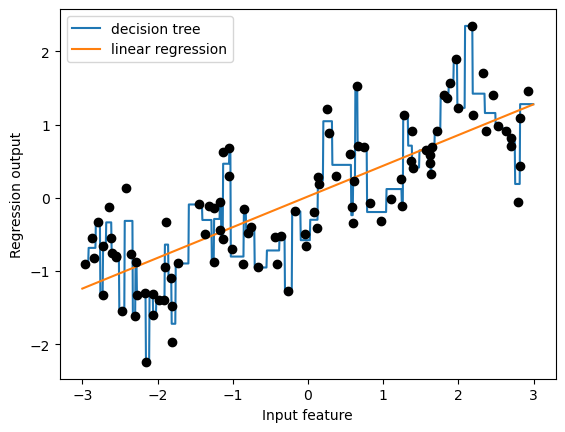

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

- One way to make linear models more powerful on continuous data is to use binning (also known as discretization) of the feature to split it up into multiple features, as described here.

In [68]:
bins = np.linspace(-3,3,11)
which_bin = np.digitize(X, bins=bins)

display(which_bin[:5])

print("\nData points:\n", X[:1])
print("\nBin membership for data points:\n", which_bin[:1])

array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2]], dtype=int64)


Data points:
 [[-0.75275929]]

Bin membership for data points:
 [[4]]


In [75]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder()
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin).toarray()
print(X_binned[:5])
display(X_binned.shape)


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


(100, 10)

Text(0.5, 0, 'Input feature')

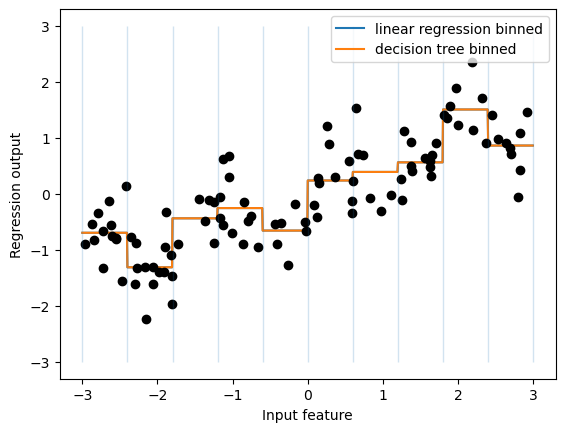

In [76]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

- If there are good reasons to use a linear model for a particular dataset—say, because it is very large and high-dimensional, but some features have nonlinear relations with the output—binning can be a great way to increase modeling power.

## Interactions and Polynomials

In [81]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


In [83]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
# plt.plot(line, reg.predict(line_combined), label='linear regression combined')
# for bin in bins:
#     plt.plot([bin, bin], [-3, 3], ':', c='k')

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [84]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


In [85]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

ValueError: dimension mismatch

### PolynomialFeatures - p227

In [90]:
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [94]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


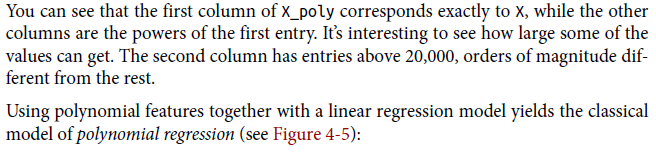

In [ ]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [ ]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    plt.plot(X[:, 0], y, 'o', c='k')
    plt.ylabel("Regression output")
    plt.xlabel("Input feature")
    plt.legend(loc="best")

## Univariate Nonlinear Transformations

In [ ]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

# bins = np.bincount(X[:, 0])
# plt.bar(range(len(bins)), bins, color='w')
# plt.ylabel("Number of appearances")
# plt.xlabel("Value")


from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
display(score)

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(np.log(X_train_log[:,0] + 1), bins=25, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
display(score)

### Automatic Feature Selection

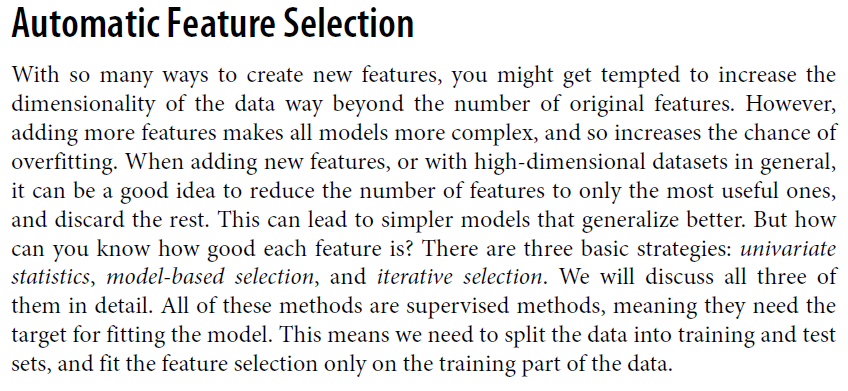

#### Univariate Statistics